In [1]:
from test_factor import *
import matplotlib.pyplot as plt

In [2]:
# 注意：原始数据的起始日期是2014-01-01，结束日期为2022-12-14
# 但是我们研究的起始日期是2020-01-02，结束日期为2022-01-01
start_date = "2020-01-02"
end_date = "2022-01-01"
change_day = 5
index_item = "000985.XSHG"
DATA_DIR = Path("database")

# 市值数据
market_cap = pd.DataFrame(
    pd.read_pickle(DATA_DIR / "market_cap.pkl"), columns=["market_cap"]
).loc[start_date:end_date]
# 行业暴露数据
industry_exposure = pd.read_pickle(DATA_DIR / "industry_exposure.pkl").loc[
    start_date:end_date
]
# 新股过滤数据
new_stock_filter = pd.read_pickle(DATA_DIR / "new_stock_filter.pkl")
# ST过滤数据
st_filter = pd.read_pickle(DATA_DIR / "st_filter.pkl")
# 停牌过滤数据
suspended_filter = pd.read_pickle(DATA_DIR / "suspended_filter.pkl")
# 涨跌停过滤数据
limit_up_down_filter = pd.read_pickle(DATA_DIR / "limit_up_down_filter.pkl")
# 收盘价数据
close = pd.read_pickle(DATA_DIR / "20140101_20221214_全A_日级别.pkl").close.unstack(
    "order_book_id"
)

# 读取因子数据
factor_alpha = (
    pd.read_pickle(DATA_DIR / "alpha_001.pkl")
    .dropna(axis=1, how="all")
    .loc[start_date:end_date]
)

In [3]:
# 券池过滤：新股 涨停 ST 停牌筛选
factor_alpha = (
    factor_alpha.mask(new_stock_filter)
    .mask(st_filter)
    .mask(suspended_filter)
    .mask(limit_up_down_filter)
).dropna(axis=1, how="all")

# 离群值处理
factor_alpha = mad_vectorized(factor_alpha)

# 标准化处理
factor_alpha = standardize(factor_alpha)

# 中性化处理
factor_alpha = neutralization_vectorized(factor_alpha, market_cap, industry_exposure)

# 计算IC
ic, performance = calc_ic(factor_alpha, change_day, index_item)

{'name': '', 'IC mean': 0.02, 'IC std': 0.03, 'IR': 0.51, 'IC>0': 0.71, 'ABS_IC>2%': 0.54, 't_stat': 11.25}


<Axes: title={'center': 'IC Cumsum'}>

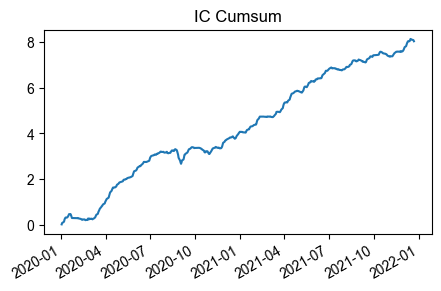

In [4]:
plt.figure()
ic.cumsum().plot(title="IC Cumsum")

<Axes: title={'center': 'IC_MONTHLY'}>

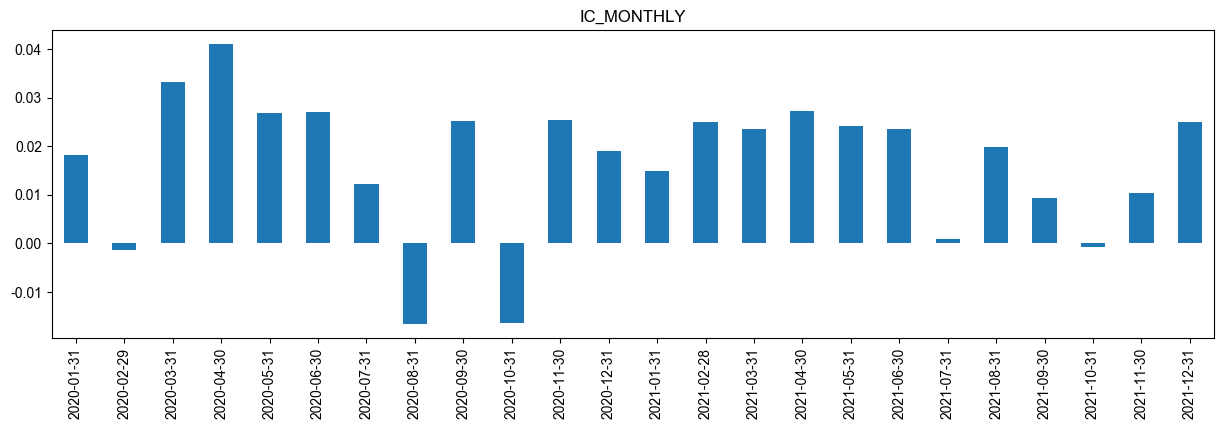

In [5]:
ic_month = ic.resample("M").mean()
ic_month.index = ic_month.index.strftime("%F")
ic_month.plot(kind="bar", figsize=(15, 4), title="IC_MONTHLY")

 当前：480 / 总量：484

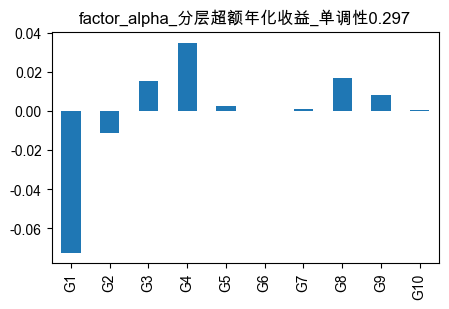

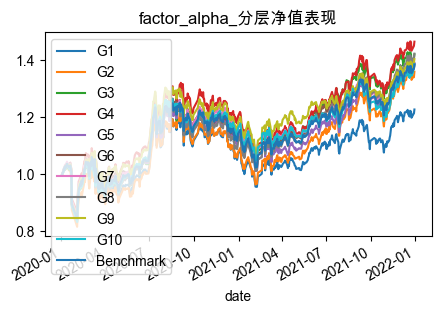

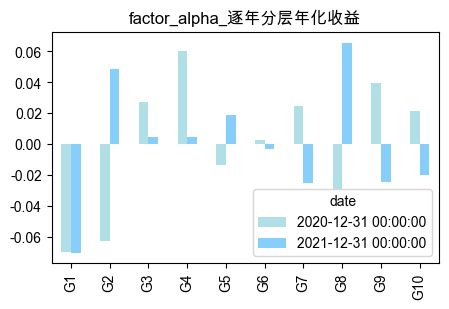

In [5]:
group_return, turnover = group_g(factor_alpha, 20, 10, index_item, name="factor_alpha")